In [11]:
import numpy as np
import matplotlib.pyplot as plt
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau)) 
def local_regression(x0, X, Y, tau):
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    xw = X.T * radial_kernel(x0, X, tau)
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    return x0 @ beta
n = 1000
X = np.linspace(-3, 3, num=n)

The Data Set ( 10 Samples) X:
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Jitter (10 Samples) X :
 [-3.05173784 -2.9416105  -3.01365999 -2.91461915 -3.15418178 -3.0668412
 -2.96362819 -2.9739526  -2.90599404]
 Xo Domain Space(10 Samples):
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


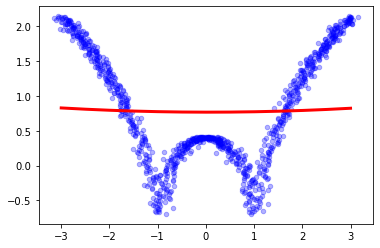

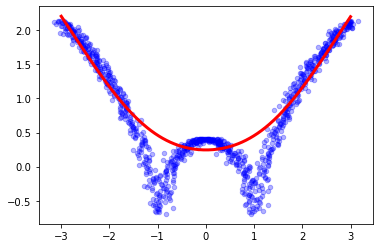

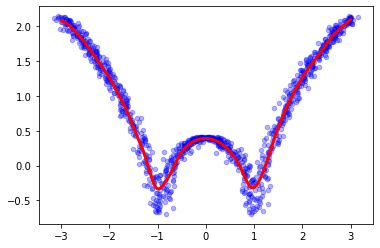

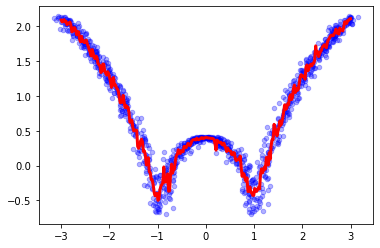

In [12]:
print("The Data Set ( 10 Samples) X:\n", X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y:\n", Y[1:10])
X += np.random.normal(scale=.1, size=n)
print("Jitter (10 Samples) X :\n", X[1:10])
domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples):\n", domain[1:10])
def plot_lwr(tau):
    predictions = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.scatter(X, Y, color='blue', alpha=0.3, s=20)
    plt.plot(domain, predictions, color='red', linewidth=3)
    plt.show()  
plot_lwr(10.)
plot_lwr(1.)
plot_lwr(0.1)
plot_lwr(0.01)